In [171]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import OneHotEncoder
import numpy as np

In [172]:
# Load movie data
import pandas as pd
all_data_df = pd.read_pickle('../dump/all_correctRT_data')

In [173]:
# all_data_df.head()

In [311]:
all_df = all_data_df.drop(columns=['rating','vote','metascore','keywords',\
                                       'link_d','link_s','link_w',\
                                   'book_title','rating_value','rating_count','review_count','title']).\
                    drop_duplicates(subset=['movie_title','director'])
all_df.rename(columns = {'certificate':'MPAA'},inplace=True)

In [312]:
all_df = all_df.dropna().reset_index()

In [313]:
all_df

,index,movie_title,MPAA,genre,release_date,budget,opening_weekend_usa,gross_usa,gross_world,runtime,...,writer,star,distributor,language,country,author,page,year,book_popularity,author_popularity
0,1,The Godfather,R,"[Crime, Drama]",1972-03-24,6000000.0,302393.0,134966411.0,2.461210e+08,175.0,...,"[Mario Puzo, Francis Ford Coppola]","[Marlon Brando, Al Pacino, James Caan]",ParamountPictures,"[English, Italian, Latin]",[USA],Mario Puzo,448.0,1969.0,0.16,0.0699
1,2,Harry Potter and the Sorcerer's Stone,PG,"[Adventure, Family, Fantasy]",2001-11-16,125000000.0,90294621.0,318087620.0,1.006918e+09,159.0,...,"[J.K. Rowling, Steve Kloves]","[Daniel Radcliffe, Rupert Grint, Richard Harris]",WarnerBros.,[English],"[UK, USA]",J.K. Rowling,309.0,1997.0,0.14,0.0149
2,4,Little Women,PG,"[Drama, Romance]",2019-12-25,40000000.0,16755310.0,108101214.0,2.166012e+08,135.0,...,"[Greta Gerwig, Louisa May Alcott]","[Saoirse Ronan, Emma Watson, Florence Pugh]",ColumbiaPictures,"[English, French]",[USA],Louisa May Alcott,449.0,1868.0,0.00,0.0151
3,8,Little Women,PG,"[Drama, Family, Romance]",1994-12-25,18000000.0,2411247.0,50083616.0,5.008362e+07,115.0,...,"[Louisa May Alcott, Robin Swicord]","[Susan Sarandon, Winona Ryder, Kirsten Dunst]",ColumbiaPictures,"[English, German, French]","[USA, Canada]",Louisa May Alcott,449.0,1868.0,0.00,0.0151
4,20,Ready Player One,PG-13,"[Action, Adventure, Sci-Fi]",2018-03-29,175000000.0,41764050.0,137690172.0,5.828937e+08,140.0,...,"[Zak Penn, Ernest Cline]","[Tye Sheridan, Olivia Cooke, Ben Mendelsohn]",WarnerBros.,[English],"[USA, India]",Ernest Cline,374.0,2011.0,0.00,0.0012
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
576,1552,Never Die Alone,R,"[Action, Crime, Drama]",2004-03-26,3000000.0,3089993.0,5645298.0,5.923000e+06,88.0,...,"[Donald Goines, James Gibson]","[DMX, David Arquette, Michael Ealy]",BloodlineFilms,[English],[USA],Lisa Jackson,480.0,2015.0,0.26,0.0093
577,1554,Radio Free Albemuth,R,"[Drama, Sci-Fi]",2014-06-27,3600000.0,5553.0,9365.0,9.365000e+03,111.0,...,"[John Alan Simon, Philip K. Dick]","[Shea Whigham, Jonathan Scarfe, Michael Rothhaar]",OpenPictures,[English],[USA],Philip K. Dick,214.0,1985.0,0.00,0.0039
578,1559,The Golden Bowl,R,"[Drama, Romance]",2001-05-25,15000000.0,90170.0,3050532.0,5.753678e+06,130.0,...,"[Henry James, Ruth Prawer Jhabvala]","[Uma Thurman, Jeremy Northam, Kate Beckinsale]",MerchantIvoryProductions,[English],"[USA, France, UK]",Henry James,591.0,1904.0,0.36,0.7878
579,1567,The Good Mother,R,"[Drama, Romance]",1988-11-04,14000000.0,1804288.0,4764606.0,4.764606e+06,104.0,...,"[Michael Bortman, Sue Miller]","[Diane Keaton, Liam Neeson, Jason Robards]",TouchstonePictures,[English],[USA],Sue Miller,320.0,1986.0,1.56,0.2796


In [314]:
all_df.shape

(581, 21)

In [178]:
all_df.columns

Index(['index', 'movie_title', 'MPAA', 'genre', 'release_date', 'budget',
       'opening_weekend_usa', 'gross_usa', 'gross_world', 'runtime',
       'director', 'writer', 'star', 'distributor', 'language', 'country',
       'author', 'page', 'year', 'book_popularity', 'author_popularity'],
      dtype='object')

In [179]:
all_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 581 entries, 0 to 580
Data columns (total 21 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   index                581 non-null    int64         
 1   movie_title          581 non-null    object        
 2   MPAA                 581 non-null    object        
 3   genre                581 non-null    object        
 4   release_date         581 non-null    datetime64[ns]
 5   budget               581 non-null    float64       
 6   opening_weekend_usa  581 non-null    float64       
 7   gross_usa            581 non-null    float64       
 8   gross_world          581 non-null    float64       
 9   runtime              581 non-null    float64       
 10  director             581 non-null    object        
 11  writer               581 non-null    object        
 12  star                 581 non-null    object        
 13  distributor          581 non-null  

## Clean each column


### *Target variable: opening weekend usa* 


<AxesSubplot:>

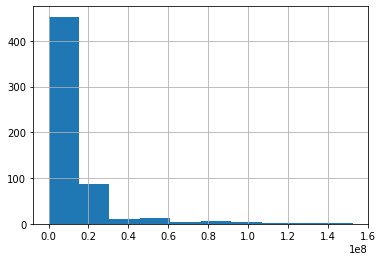

In [180]:
all_df['opening_weekend_usa'].hist(bins=10)

In [181]:
all_df['opening_weekend_usa'].max()

152535747.0

In [182]:
tt = all_df[(all_df['opening_weekend_usa']<2e8) & (all_df['opening_weekend_usa'] > 1e6)]

<AxesSubplot:>

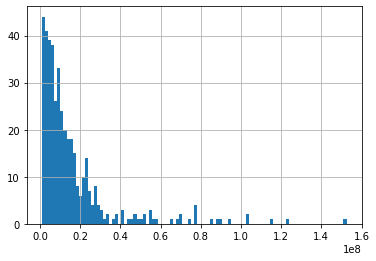

In [183]:
tt['opening_weekend_usa'].hist(bins=100)

<AxesSubplot:>

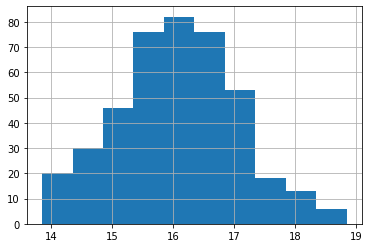

In [184]:
np.log(tt['opening_weekend_usa']).hist()

In [187]:
tt['log_opening_weekend_usa'] = np.log(tt['opening_weekend_usa'])

<ipython-input-187-dfd567e2d602>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tt['log_opening_weekend_usa'] = np.log(tt['opening_weekend_usa'])


<AxesSubplot:>

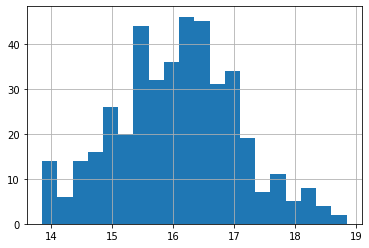

In [188]:
tt['log_opening_weekend_usa'].hist(bins=20)

In [189]:
tt.shape

(420, 22)

In [190]:
all_df = tt

### Independent variable


### Continuous variables:
#### 1. Release_year

In [191]:
all_df['release_year'] = all_df.release_date.dt.year
all_df['release_year'].dtype

<ipython-input-191-e0d167f000ff>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  all_df['release_year'] = all_df.release_date.dt.year


dtype('int64')

<AxesSubplot:>

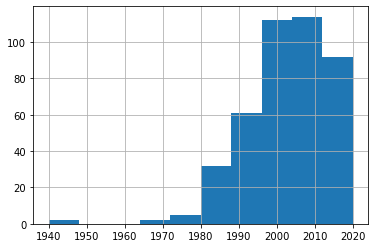

In [193]:
all_df['release_year'].hist()

In [35]:
tt = all_df[(all_df['release_year']>1970)]

In [36]:
tt.shape

(416, 23)

In [37]:
all_df = tt

#### 2. budget


<AxesSubplot:>

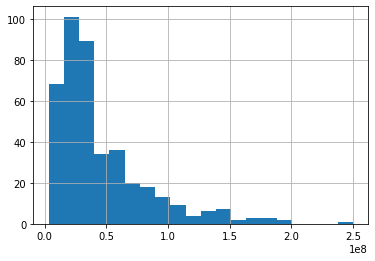

In [38]:
all_df['budget'].hist(bins=20)

In [39]:
# Remove large 
tt = all_df[all_df.budget <2e8]

<AxesSubplot:>

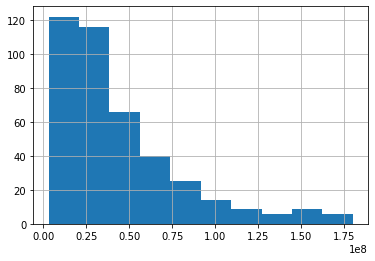

In [40]:
tt['budget'].hist()

In [41]:
tt.shape

(413, 23)

<AxesSubplot:>

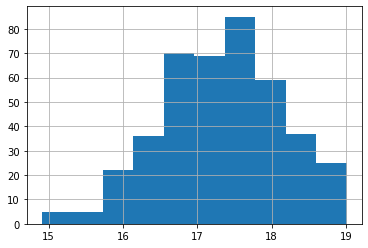

In [42]:
np.log(tt['budget']).hist()

In [43]:
tt['log_budget'] = np.log(tt['budget'])

<ipython-input-43-975e4f58418d>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tt['log_budget'] = np.log(tt['budget'])


In [44]:
all_df = tt

In [45]:
all_df.shape

(413, 24)


#### 3. runtime

<AxesSubplot:>

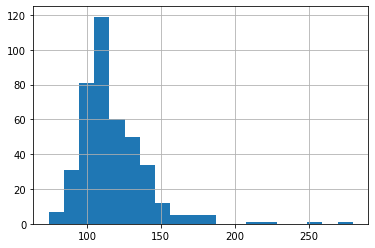

In [46]:
all_df['runtime'].hist(bins=20)

In [47]:
# Remove large 
tt = all_df[all_df.runtime <200]

<AxesSubplot:>

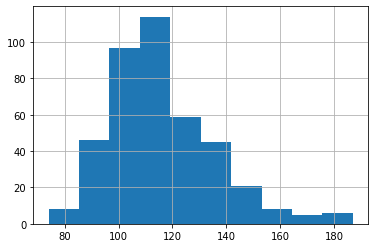

In [48]:
tt['runtime'].hist()

In [49]:
tt.shape

(409, 24)

In [50]:
all_df = tt

#### 4. page

#### 5. publish_year


#### 6. author_popularity

In [707]:
all_df.shape

(581, 22)

### Single lable categorical variables
### 1. MPAA rating
Find the distribution and keep only the top frequent categories

In [195]:
all_df.MPAA.unique()

array(['PG', 'PG-13', 'R', 'Passed', 'G'], dtype=object)

In [196]:
all_df.MPAA.value_counts()

R         173
PG-13     149
PG         87
G          10
Passed      1
Name: MPAA, dtype: int64

In [197]:
# Keep only the top 3
MPAA_discard = ['G','Passed','Not','X','M/PG','Approved','NC-17','Unrated']
all_df.MPAA.replace(MPAA_discard,'Other',inplace=True)

/opt/anaconda3/lib/python3.8/site-packages/pandas/core/series.py:4563: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().replace(


In [198]:
all_df.MPAA.value_counts()

R        173
PG-13    149
PG        87
Other     11
Name: MPAA, dtype: int64

### 2. distributor

In [199]:
all_df.distributor.value_counts().head(5)

WarnerBros.            40
ParamountPictures      30
ColumbiaPictures       29
UniversalPictures      26
TwentiethCenturyFox    22
Name: distributor, dtype: int64

In [200]:
# Keep only the top 3
distributor_keep = ['WarnerBros.','ParamountPictures','ColumbiaPictures','UniversalPictures',\
             'TwentiethCenturyFox','TwentiethCenturyFox']
distributor_discard = list(set(all_df.distributor.unique()).difference(set(distributor_keep)))
all_df.distributor.replace(distributor_discard,'Other',inplace=True)

In [201]:
all_df.distributor.value_counts()

Other                  273
WarnerBros.             40
ParamountPictures       30
ColumbiaPictures        29
UniversalPictures       26
TwentiethCenturyFox     22
Name: distributor, dtype: int64

### 3. director

In [202]:
all_df.director.value_counts()

Steven Spielberg     6
Martin Scorsese      5
Lasse Hallström      5
Mark Waters          4
Ron Howard           4
                    ..
Leigh Whannell       1
Neil Burger          1
Peter Ho-Sun Chan    1
Tomas Alfredson      1
Tony Richardson      1
Name: director, Length: 311, dtype: int64

In [203]:
# Find corresponding value of each director when movie is released
# ['avg_rating','avg_gross'] (per movie directed)
director_df = pd.read_pickle('../dump/director_data')

In [204]:
director_df.head(10)

,director,title,year,rating,vote,genre_list,budget,opening,gross_usa,gross_cw,runtime,writer,star,distributor
0,Roger Kumble,After We Collided,2020-10-23,5.0,16469.0,"[Drama, Romance]",NaN,422899.0,2386483.0,47990414.0,105.0,"[Anna Todd, Mario Celaya]","[Josephine Langford, Hero Fiennes Tiffin, Dyla...",CalMaple
1,Roger Kumble,Falling Inn Love,2019-08-29,5.6,15662.0,"[Comedy, Romance]",NaN,NaN,NaN,NaN,98.0,"[Elizabeth Hackett, Hilary Galanoy]","[Christina Milian, Adam Demos, Jeffrey Bowyer-...",NaN
2,I. Marlene King,Pretty Little Liars: The,NaT,7.1,3862.0,"[Crime, Drama, Mystery]",NaN,NaN,NaN,NaN,45.0,"[Sasha Pieterse, Janel Parrish, Sofia Carson, ...",NaN,WarnerHorizonTelevision
3,Aaron Korsh,,NaT,8.5,361371.0,"[Comedy, Drama]",NaN,NaN,NaN,NaN,44.0,"[Gabriel Macht, Patrick J. Adams, Meghan Markl...",NaN,Hypnotic
4,I. Marlene King,Famous in,NaT,6.9,5726.0,"[Drama, Romance]",NaN,NaN,NaN,NaN,42.0,"[Bella Thorne, Charlie DePew, Carter Jenkins, ...",NaN,FarahFilms
5,Erin Cardillo,Life,NaT,6.6,3401.0,"[Comedy, Drama]",NaN,NaN,NaN,NaN,44.0,"[Lucy Hale, Elliot Knight, Jayson Blair, See f...",NaN,InGoodCompany
6,I. Marlene King,Pretty Little,NaT,7.4,151550.0,"[Drama, Mystery, Romance]",NaN,NaN,NaN,NaN,NaN,"[Troian Bellisario, Ashley Benson, Lucy Hale, ...",NaN,ABCFamily
7,Roger Kumble,Cruel Intentions,NaT,7.6,293.0,[Drama],NaN,NaN,NaN,NaN,97.0,"[Roger Kumble, Lindsey Rosin]","[Sarah Michelle Gellar, Nathalie Kelley, Peter...",AMBIGroup
8,Adam Cayton-Holland,Those Who,NaT,7.2,1238.0,[Comedy],NaN,NaN,NaN,NaN,30.0,"[Maria Thayer, Adam Cayton-Holland, Ben Roy, S...",NaN,3ArtsEntertainment
9,Mindy Kaling,The Mindy,NaT,7.4,28496.0,[Comedy],NaN,NaN,NaN,NaN,30.0,"[Mindy Kaling, Ike Barinholtz, Ed Weeks, See f...",NaN,KalingInternational


In [205]:
director_rating_mean = int(director_df.rating.mean())
director_gross_mean = int(director_df.gross_usa.mean())

director_rating_mean, director_gross_mean

(6, 32634196)

In [206]:
import numpy as np
def director_value(movie):
    
    movie_title = movie.movie_title
    director = movie.director
    year = movie.release_date

    headers = ['movie_title','director','film_count_d','avg_rating_d','avg_gross_d']
    
    # Assign default values
    film_count,avg_rating,avg_gross = 0, director_rating_mean, director_gross_mean
    
    doi_df = director_df[(director_df.director == director) & (director_df.year < year)]
    
    # Fill NaN with director's mean
    doi_df[['rating','gross_usa']].apply(lambda x: x.fillna(x.mean(),axis=0))
    
    # If there's still NaN, fill with all directors' mean
    doi_df[['rating']] = doi_df[['rating']].apply(lambda x: x.fillna(director_rating_mean,axis=0))
    doi_df[['gross_usa']] = doi_df[['gross_usa']].apply(lambda x: x.fillna(director_gross_mean,axis=0))
    
   
    if doi_df.shape[0] == 0:
        film_count,avg_rating,avg_gross = 0, director_rating_mean, director_gross_mean
    else:
        
    
    
        film_count = doi_df.shape[0]

        
        avg_rating = doi_df['rating'].mean()
        if avg_rating == np.nan:
            avg_rating = director_rating_mean

        try:
            avg_gross = int(doi_df['gross_usa'].mean())
        except ValueError:
            avg_gross = director_gross_mean
        
    
    director_value = dict(zip(headers, [movie_title,director,film_count,avg_rating,avg_gross]))
    
    return director_value

In [207]:
# Create df including columns of director film_count, avg_rating, avg_gross
# Rows correspond to rows in all_df
movie_director_df = all_df.dropna().apply(director_value,axis=1).apply(pd.Series)

In [208]:
movie_director_df

,movie_title,director,film_count_d,avg_rating_d,avg_gross_d
1,Harry Potter and the Sorcerer's Stone,Chris Columbus,9,6.622222,106588545
2,Little Women,Greta Gerwig,2,6.700000,24481851
3,Little Women,Gillian Armstrong,11,6.663636,24220795
4,Ready Player One,Steven Spielberg,34,7.202941,132444136
5,The Invisible Man,Leigh Whannell,2,6.800000,32097844
...,...,...,...,...,...
572,Legends of Oz: Dorothy's Return,Will Finn,1,5.400000,50030461
573,Tai-Pan,Daryl Duke,4,6.575000,32634196
574,Losing Isaiah,Stephen Gyllenhaal,4,6.025000,9153181
576,Never Die Alone,Ernest R. Dickerson,7,6.157143,20446469


In [209]:
movie_director_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 420 entries, 1 to 579
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   movie_title   420 non-null    object 
 1   director      420 non-null    object 
 2   film_count_d  420 non-null    int64  
 3   avg_rating_d  420 non-null    float64
 4   avg_gross_d   420 non-null    int64  
dtypes: float64(1), int64(2), object(2)
memory usage: 19.7+ KB


In [210]:
# Merge all_df and director value
all_d_df = pd.merge(all_df, movie_director_df, left_index=True, right_index=True ,how='left')

In [211]:
all_d_df.head()

,index,movie_title_x,MPAA,genre,release_date,budget,opening_weekend_usa,gross_usa,gross_world,runtime,...,year,book_popularity,author_popularity,log_opening_weekend_usa,release_year,movie_title_y,director_y,film_count_d,avg_rating_d,avg_gross_d
1,2,Harry Potter and the Sorcerer's Stone,PG,"[Adventure, Family, Fantasy]",2001-11-16,125000000.0,90294621.0,318087620.0,1.006918e+09,159.0,...,1997.0,0.14,0.0149,18.318588,2001,Harry Potter and the Sorcerer's Stone,Chris Columbus,9,6.622222,106588545
2,4,Little Women,PG,"[Drama, Romance]",2019-12-25,40000000.0,16755310.0,108101214.0,2.166012e+08,135.0,...,1868.0,0.00,0.0151,16.634226,2019,Little Women,Greta Gerwig,2,6.700000,24481851
3,8,Little Women,PG,"[Drama, Family, Romance]",1994-12-25,18000000.0,2411247.0,50083616.0,5.008362e+07,115.0,...,1868.0,0.00,0.0151,14.695655,1994,Little Women,Gillian Armstrong,11,6.663636,24220795
4,20,Ready Player One,PG-13,"[Action, Adventure, Sci-Fi]",2018-03-29,175000000.0,41764050.0,137690172.0,5.828937e+08,140.0,...,2011.0,0.00,0.0012,17.547546,2018,Ready Player One,Steven Spielberg,34,7.202941,132444136
5,21,The Invisible Man,R,"[Drama, Horror, Mystery]",2020-02-28,7000000.0,28205665.0,70410000.0,1.431510e+08,124.0,...,1897.0,0.00,0.1500,17.155033,2020,The Invisible Man,Leigh Whannell,2,6.800000,32097844


In [212]:
all_d_df.shape

(420, 28)

### 4. author

In [213]:
all_df.author.value_counts()

Stephen King        15
Nicholas Sparks      9
Michael Crichton     7
John Grisham         6
J.K. Rowling         6
                    ..
Iris Johansen        1
Walter Mosley        1
Scott Turow          1
Richard Atwater      1
Tim LaHaye           1
Name: author, Length: 320, dtype: int64

In [214]:
# Find corresponding value of each authorr when movie is released
# ['publications','author_visibility']
# Load author_book_data (author: list of publication years)
author_book_df = pd.read_pickle('../dump/author_book_data')

In [215]:
author_book_df.head(10)

,author,years
0,Anna Todd,"[2020, 2018, 2018, 2017, 2017, 2016, 2016, 201..."
1,Alex Flinn,"[2020, 2019, 2017, 2015, 2015, 2013, 2012, 201..."
2,James Fenimore Cooper,"[2017, 2012, 2012, 2010, 2009, 2006, 1841, 1826]"
3,Amy Daws,"[2020, 2019, 2019, 2018, 2018, 2018, 2018, 201..."
4,John Bellairs,"[2020, 2015, 2009, 2004, 2004, 2004, 2004, 200..."
5,Knut Hamsun,"[2013, 2011, 2010, 2007, 2002, 2000, 1998, 199..."
6,Agatha Christie,"[2020, 2020, 2020, 2020, 1998, 1989, 1989, 198..."
7,Nicholas Shakespeare,"[2020, 2007, 2004, 1997, 1993, 1990]"
8,Maurice G. Dantec,"[2009, 2008, 2005]"
9,Trevanian,"[2005, 2005, 2005, 2002, 1998, 1988, 1988, 1984]"


In [216]:
import numpy as np
def author_value(movie):
    
    movie_title = movie.movie_title
    author = movie.author
    year = movie.release_year

    headers = ['movie_title','author','publication_count']
    
    # Assign default values
    publication_count = np.nan
    
    aoi_df = author_book_df[(author_book_df.author == author)]
    publications = [book for book in aoi_df.iloc[0,1] if book < year]
    publication_count = len(publications)

        
    author_value = dict(zip(headers, [movie_title,author,publication_count]))
    
    return author_value

In [217]:
# Create df including columns of author publication_count
# Rows correspond to rows in all_df
movie_author_df = all_df.dropna().apply(author_value,axis=1).apply(pd.Series)

In [218]:
movie_author_df

,movie_title,author,publication_count
1,Harry Potter and the Sorcerer's Stone,J.K. Rowling,4
2,Little Women,Louisa May Alcott,0
3,Little Women,Louisa May Alcott,0
4,Ready Player One,Ernest Cline,2
5,The Invisible Man,H.G. Wells,0
...,...,...,...
572,Legends of Oz: Dorothy's Return,Denton J. Tipton,2
573,Tai-Pan,James Clavell,6
574,Losing Isaiah,Seth Margolis,3
576,Never Die Alone,Lisa Jackson,65


In [219]:
# Merge all_d_df and director value
all_df = pd.merge(all_d_df, movie_author_df, left_index=True, right_index=True ,how='left').\
    drop(columns=['movie_title','movie_title_y','director_y','author_y'])

In [220]:
all_df.head()

,index,movie_title_x,MPAA,genre,release_date,budget,opening_weekend_usa,gross_usa,gross_world,runtime,...,page,year,book_popularity,author_popularity,log_opening_weekend_usa,release_year,film_count_d,avg_rating_d,avg_gross_d,publication_count
1,2,Harry Potter and the Sorcerer's Stone,PG,"[Adventure, Family, Fantasy]",2001-11-16,125000000.0,90294621.0,318087620.0,1.006918e+09,159.0,...,309.0,1997.0,0.14,0.0149,18.318588,2001,9,6.622222,106588545,4
2,4,Little Women,PG,"[Drama, Romance]",2019-12-25,40000000.0,16755310.0,108101214.0,2.166012e+08,135.0,...,449.0,1868.0,0.00,0.0151,16.634226,2019,2,6.700000,24481851,0
3,8,Little Women,PG,"[Drama, Family, Romance]",1994-12-25,18000000.0,2411247.0,50083616.0,5.008362e+07,115.0,...,449.0,1868.0,0.00,0.0151,14.695655,1994,11,6.663636,24220795,0
4,20,Ready Player One,PG-13,"[Action, Adventure, Sci-Fi]",2018-03-29,175000000.0,41764050.0,137690172.0,5.828937e+08,140.0,...,374.0,2011.0,0.00,0.0012,17.547546,2018,34,7.202941,132444136,2
5,21,The Invisible Man,R,"[Drama, Horror, Mystery]",2020-02-28,7000000.0,28205665.0,70410000.0,1.431510e+08,124.0,...,192.0,1897.0,0.00,0.1500,17.155033,2020,2,6.800000,32097844,0


In [221]:
all_df.shape

(420, 27)

In [222]:
all_df['log_avg_gross_d'] = np.log(all_df['avg_gross_d'])

In [223]:
all_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 420 entries, 1 to 579
Data columns (total 28 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   index                    420 non-null    int64         
 1   movie_title_x            420 non-null    object        
 2   MPAA                     420 non-null    object        
 3   genre                    420 non-null    object        
 4   release_date             420 non-null    datetime64[ns]
 5   budget                   420 non-null    float64       
 6   opening_weekend_usa      420 non-null    float64       
 7   gross_usa                420 non-null    float64       
 8   gross_world              420 non-null    float64       
 9   runtime                  420 non-null    float64       
 10  director_x               420 non-null    object        
 11  writer                   420 non-null    object        
 12  star                     420 non-nul

In [224]:
all_df.corr()

,index,budget,opening_weekend_usa,gross_usa,gross_world,runtime,page,year,book_popularity,author_popularity,log_opening_weekend_usa,release_year,film_count_d,avg_rating_d,avg_gross_d,publication_count,log_avg_gross_d
index,1.000000,-0.373413,-0.489995,-0.569512,-0.569002,-0.326418,-0.093837,0.056867,-0.024709,-0.087718,-0.547695,-0.247096,-0.134253,-0.207481,-0.205552,-0.161090,-0.160800
budget,-0.373413,1.000000,0.597789,0.531330,0.644454,0.206860,0.040276,-0.116204,-0.047813,-0.018731,0.587313,0.296767,0.214451,0.152878,0.397543,0.128689,0.302432
opening_weekend_usa,-0.489995,0.597789,1.000000,0.854075,0.860233,0.199891,0.124591,-0.001172,0.165315,0.095900,0.810906,0.276544,0.091241,0.113433,0.260066,0.185003,0.165005
gross_usa,-0.569512,0.531330,0.854075,1.000000,0.934251,0.248846,0.115660,-0.071722,0.117637,0.026046,0.723802,0.054822,0.131950,0.133478,0.300786,0.122072,0.212302
gross_world,-0.569002,0.644454,0.860233,0.934251,1.000000,0.253341,0.125233,-0.050269,0.084880,0.078701,0.708061,0.161122,0.187092,0.120885,0.328368,0.123097,0.218877
runtime,-0.326418,0.206860,0.199891,0.248846,0.253341,1.000000,0.290747,0.042588,0.054816,0.024970,0.113909,-0.083279,0.256338,0.292711,0.145772,-0.002515,0.133405
page,-0.093837,0.040276,0.124591,0.115660,0.125233,0.290747,1.000000,-0.025682,0.190027,0.062891,0.073765,-0.003840,0.041542,0.026757,-0.017574,0.042054,0.046346
year,0.056867,-0.116204,-0.001172,-0.071722,-0.050269,0.042588,-0.025682,1.000000,-0.038632,0.047698,0.020665,0.252789,0.025341,-0.045367,-0.043538,-0.125718,-0.037294
book_popularity,-0.024709,-0.047813,0.165315,0.117637,0.084880,0.054816,0.190027,-0.038632,1.000000,0.135106,0.035368,-0.088985,-0.066899,0.066610,0.027104,0.178477,-0.028980
author_popularity,-0.087718,-0.018731,0.095900,0.026046,0.078701,0.024970,0.062891,0.047698,0.135106,1.000000,0.095265,0.045942,0.063567,0.051215,-0.041377,0.004455,-0.134195


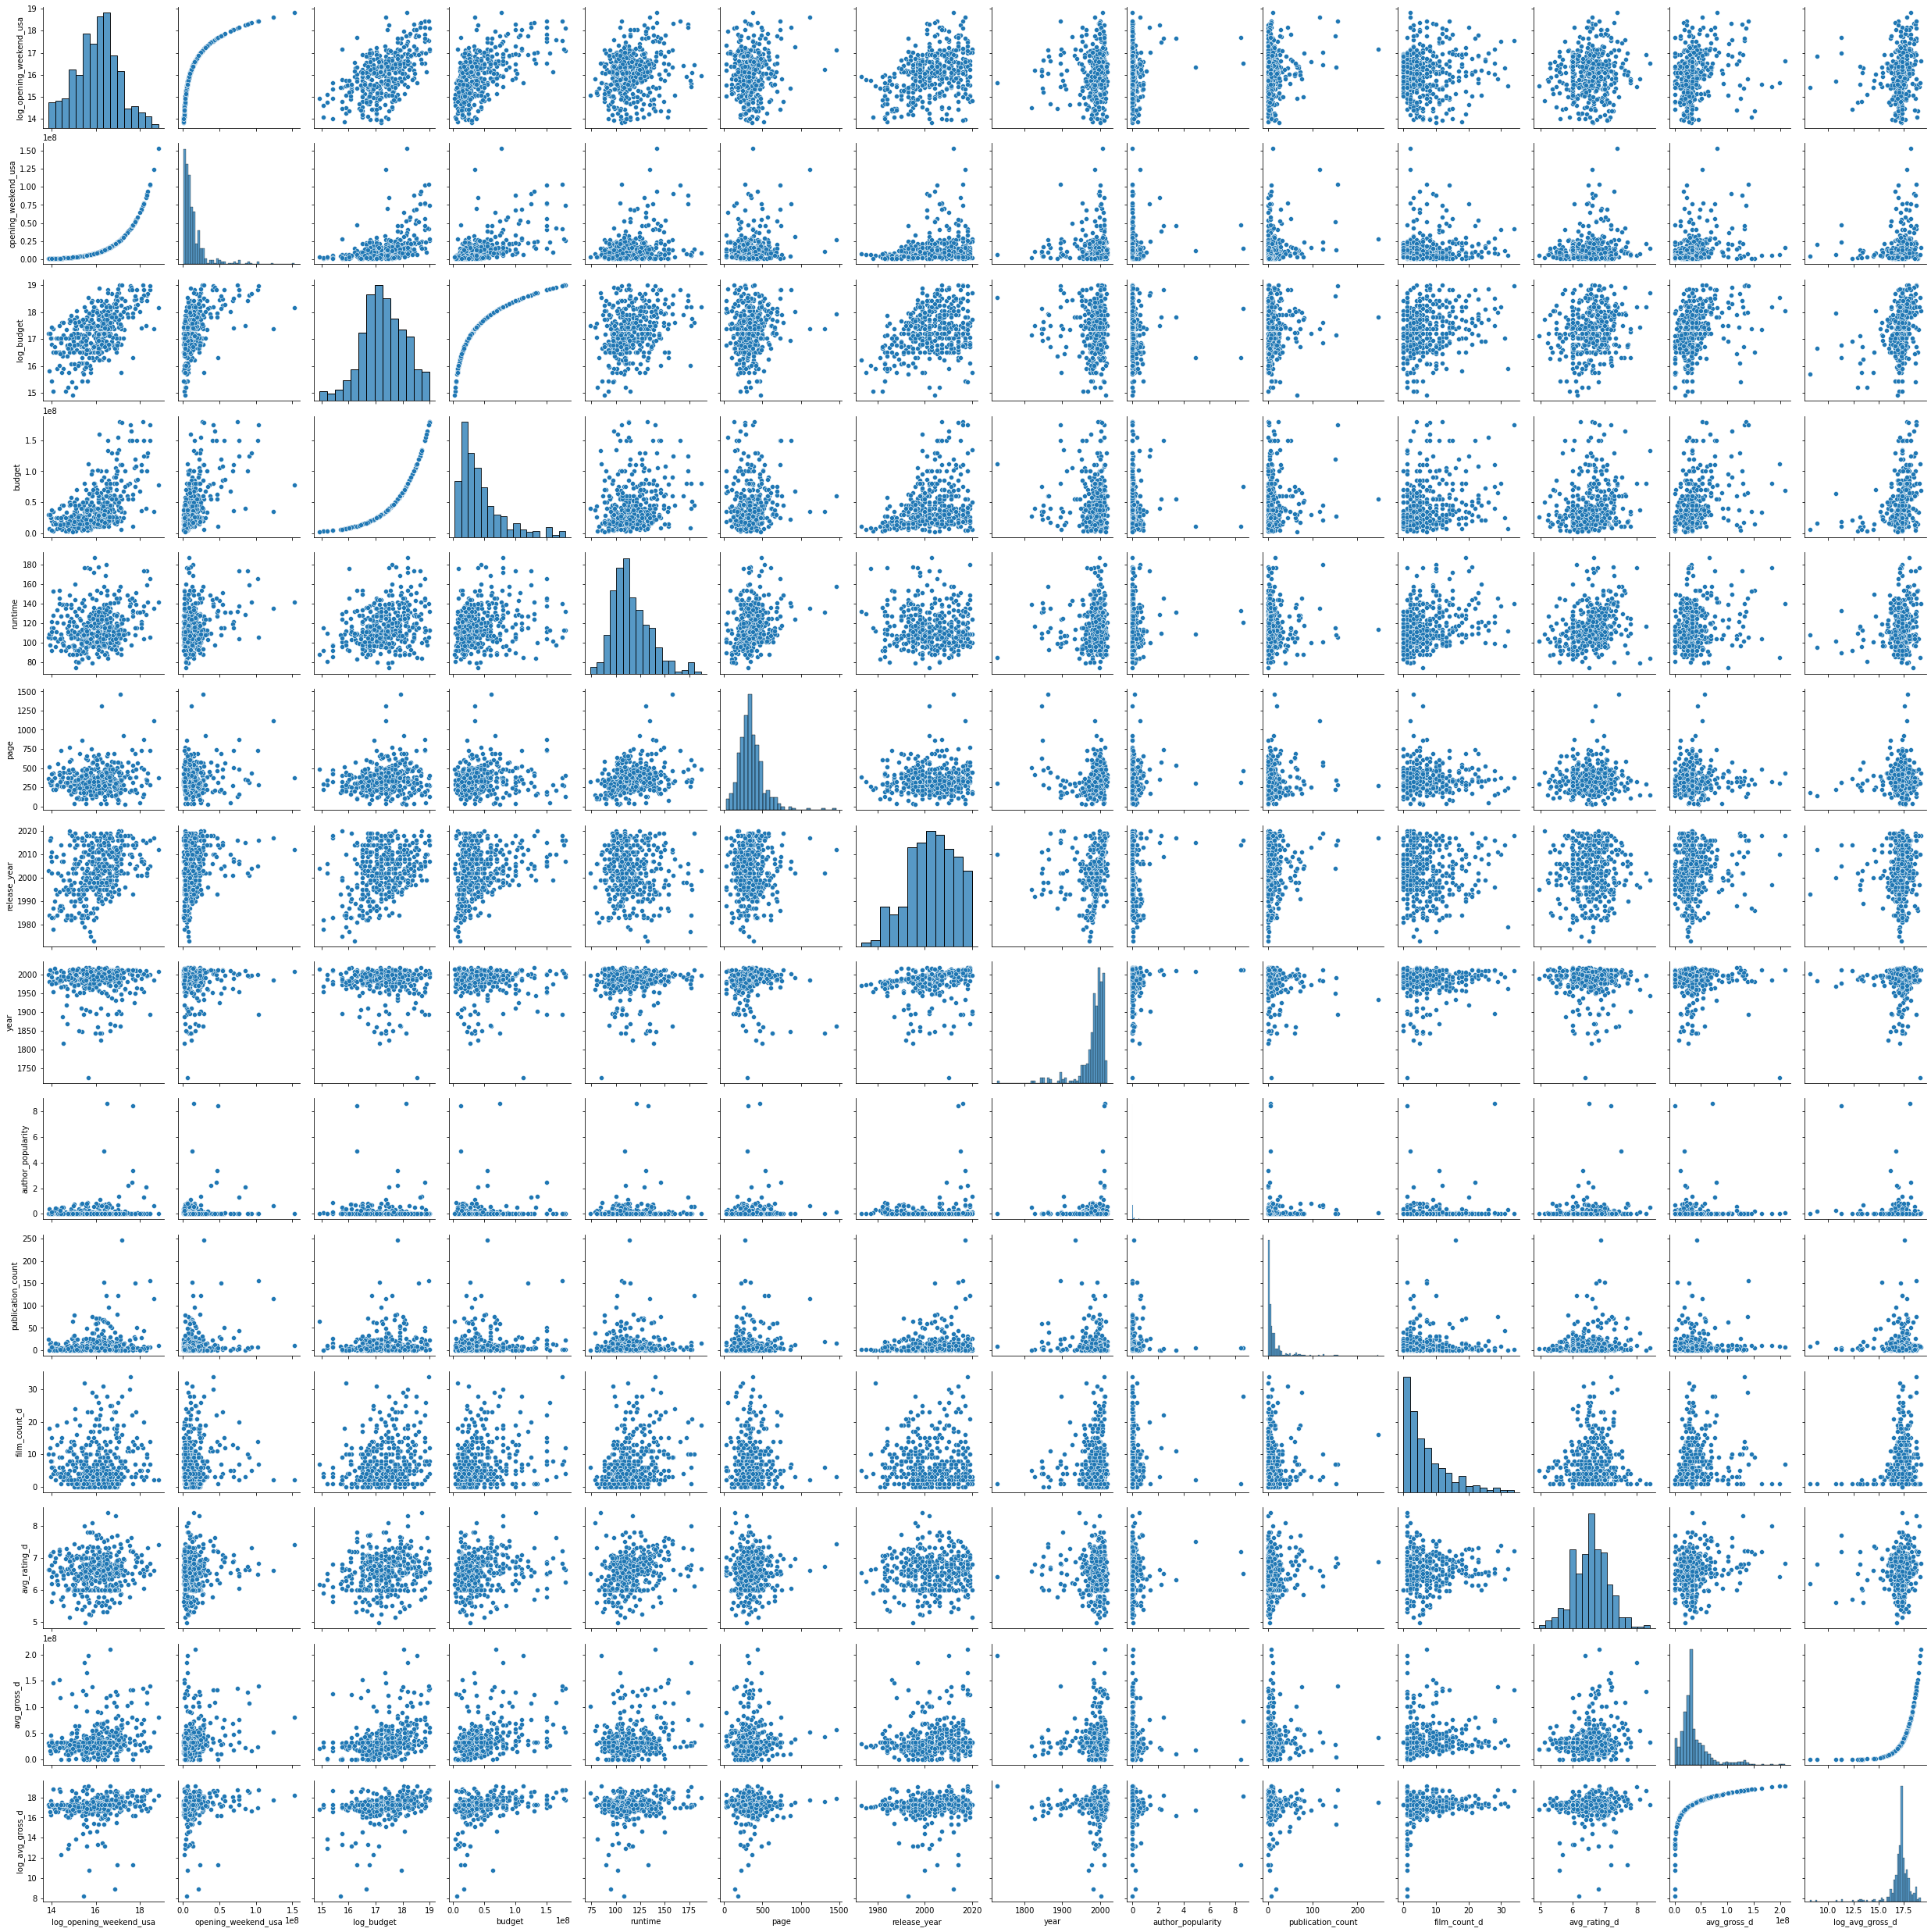

In [84]:
import seaborn as sns
sns.pairplot(all_df[['log_opening_weekend_usa','opening_weekend_usa',\
                     'log_budget','budget', 'runtime', 'page', 'release_year','year',\
                     'author_popularity', 'publication_count',\
                     'film_count_d','avg_rating_d','avg_gross_d','log_avg_gross_d']])

In [85]:
# # Take log of opening_weekend_usa as target and graph.
# all_df['log_opening_weekend_usa'] = np.log(all_df.opening_weekend_usa)
# all_df['log_opening_weekend_usa'].hist()

In [86]:
# all_df['log_year'] = np.log(all_df.year)
# all_df['log_budget'] = np.log(all_df.budget)
# all_df['log_avg_gross_d'] = np.log(all_df.avg_gross_d)

In [87]:
# all_df['log_year'].hist()

In [88]:
# all_df['log_budget'].hist()

In [89]:
# all_df['log_avg_gross_d'].hist()

In [90]:
# all_df['publication_count'].hist()

In [91]:
# all_df['log_publication_count'] = np.log(all_df.publication_count)
# all_df['log_publication_count'].hist()

### Multilabel categorical labels
### 1. genre
Find the top frequent genres and convert the column from list to set in preparation for `MultiLabelBinarizer()`.

In [235]:
# Find the top 10 genre
genre_all = []
for row in all_df.genre:
    genre_all += row
genre_count = []
for genre in set(genre_all):
    genre_count.append({'genre':genre,'count':genre_all.count(genre)})
sorted(genre_count, key = lambda i: i['count'],reverse=True)

[{'genre': 'Drama', 'count': 269},
 {'genre': 'Comedy', 'count': 108},
 {'genre': 'Adventure', 'count': 100},
 {'genre': 'Action', 'count': 99},
 {'genre': 'Romance', 'count': 89},
 {'genre': 'Thriller', 'count': 81},
 {'genre': 'Crime', 'count': 79},
 {'genre': 'Family', 'count': 64},
 {'genre': 'Mystery', 'count': 62},
 {'genre': 'Fantasy', 'count': 55},
 {'genre': 'Sci-Fi', 'count': 39},
 {'genre': 'Horror', 'count': 35},
 {'genre': 'Animation', 'count': 13},
 {'genre': 'History', 'count': 9},
 {'genre': 'Biography', 'count': 7},
 {'genre': 'War', 'count': 6},
 {'genre': 'Music', 'count': 6},
 {'genre': 'Western', 'count': 3},
 {'genre': 'Sport', 'count': 2},
 {'genre': 'Musical', 'count': 1}]

In [236]:
# Keep only the top 10 genre
genre_list = ['Drama','Adventure','Comedy','Action','Crime','Romance','Thriller',\
              'Mystery','Family','Fantasy']

In [237]:
# The rest will go to "Other"
all_df['genre']= all_df.genre.apply(lambda x:\
                            [genre if genre in genre_list else 'Other'for genre in x])

In [238]:
# movie_df.head()

In [239]:
# Convert genre column from list to set
all_df['genre'] = all_df.genre.apply(lambda x: set(x))
all_df[['genre']]

,genre
1,"{Adventure, Fantasy, Family}"
2,"{Drama, Romance}"
3,"{Drama, Romance, Family}"
4,"{Other, Action, Adventure}"
5,"{Drama, Other, Mystery}"
...,...
572,"{Other, Adventure, Family}"
573,{Adventure}
574,{Drama}
576,"{Drama, Crime, Action}"


### 2. language

In [240]:
# Find the top 10 language
language_all = []
for row in all_df.language:
    language_all += row
language_count = []
for language in set(language_all):
    language_count.append({'language':language,'count':language_all.count(language)})
sorted(language_count, key = lambda i: i['count'],reverse=True)

[{'language': 'English', 'count': 420},
 {'language': 'French', 'count': 45},
 {'language': 'Spanish', 'count': 36},
 {'language': 'German', 'count': 29},
 {'language': 'Russian', 'count': 25},
 {'language': 'Italian', 'count': 23},
 {'language': 'Arabic', 'count': 11},
 {'language': 'Mandarin', 'count': 9},
 {'language': 'Japanese', 'count': 6},
 {'language': 'Portuguese', 'count': 5},
 {'language': 'Latin', 'count': 5},
 {'language': 'Polish', 'count': 4},
 {'language': 'Ukrainian', 'count': 4},
 {'language': 'Swedish', 'count': 3},
 {'language': 'Chinese', 'count': 3},
 {'language': 'Turkish', 'count': 3},
 {'language': 'Dutch', 'count': 3},
 {'language': 'Cantonese', 'count': 2},
 {'language': 'NorthAmericanIndian', 'count': 2},
 {'language': 'Danish', 'count': 2},
 {'language': 'Serbian', 'count': 2},
 {'language': 'Hindi', 'count': 2},
 {'language': 'Greek', 'count': 2},
 {'language': 'Thai', 'count': 2},
 {'language': 'Hebrew', 'count': 2},
 {'language': 'Icelandic', 'count': 2}

In [241]:
# Keep only the top 6 language
language_list = ['English','French','German','Spanish','Russian','Italian']

In [242]:
# The rest will go to "Other"
all_df['language']= all_df.language.apply(lambda x:\
                            [language if language in language_list else 'Other' for language in x])

In [243]:
# Convert genre column from list to set
all_df['language'] = all_df.language.apply(lambda x: set(x))
all_df[['language']]

,language
1,{English}
2,"{French, English}"
3,"{German, French, English}"
4,{English}
5,{English}
...,...
572,{English}
573,{English}
574,{English}
576,{English}


### 3. country

In [244]:
# Find the top 10 language
country_all = []
for row in all_df.country:
    country_all += row
country_count = []
for country in set(country_all):
    country_count.append({'country':country,'count':country_all.count(country)})
sorted(country_count, key = lambda i: i['count'],reverse=True)

[{'country': 'USA', 'count': 420},
 {'country': 'UK', 'count': 97},
 {'country': 'Germany', 'count': 40},
 {'country': 'Canada', 'count': 32},
 {'country': 'France', 'count': 26},
 {'country': 'India', 'count': 13},
 {'country': 'Italy', 'count': 9},
 {'country': 'China', 'count': 8},
 {'country': 'Australia', 'count': 8},
 {'country': 'Mexico', 'count': 7},
 {'country': 'Sweden', 'count': 5},
 {'country': 'Ireland', 'count': 5},
 {'country': 'Japan', 'count': 5},
 {'country': 'Hungary', 'count': 4},
 {'country': 'Switzerland', 'count': 4},
 {'country': 'NewZealand', 'count': 4},
 {'country': 'UnitedArabEmirates', 'count': 3},
 {'country': 'CzechRepublic', 'count': 3},
 {'country': 'Spain', 'count': 3},
 {'country': 'HongKong', 'count': 3},
 {'country': 'Israel', 'count': 2},
 {'country': 'Malta', 'count': 2},
 {'country': 'Romania', 'count': 2},
 {'country': 'Bulgaria', 'count': 1},
 {'country': 'WestGermany', 'count': 1},
 {'country': 'Russia', 'count': 1},
 {'country': 'Denmark', 'c

In [245]:
# Keep only the top 5 country
country_list = ['USA','UK','Germany','France','Canada']

In [246]:
# The rest will go to "Other"
all_df['country']= all_df.country.apply(lambda x:\
                            [country if country in country_list else 'Other' for country in x])

In [247]:
# Convert genre column from list to set
all_df['country'] = all_df.country.apply(lambda x: set(x))
all_df[['country']]

,country
1,"{USA, UK}"
2,{USA}
3,"{USA, Canada}"
4,"{USA, Other}"
5,"{USA, Other, Canada}"
...,...
572,"{USA, Other}"
573,{USA}
574,{USA}
576,{USA}


### 4. actor

In [248]:
# Find corresponding value of each authorr when movie is released
# ['publications','author_visibility']


## Train test split

In [249]:
all_df.columns

Index(['index', 'movie_title_x', 'MPAA', 'genre', 'release_date', 'budget',
       'opening_weekend_usa', 'gross_usa', 'gross_world', 'runtime',
       'director_x', 'writer', 'star', 'distributor', 'language', 'country',
       'author_x', 'page', 'year', 'book_popularity', 'author_popularity',
       'log_opening_weekend_usa', 'release_year', 'film_count_d',
       'avg_rating_d', 'avg_gross_d', 'publication_count', 'log_avg_gross_d'],
      dtype='object')

In [250]:
# Train test split
from sklearn.model_selection import train_test_split

X= all_df[['MPAA', 'distributor',\
           'genre', 'language', 'country',\
           'release_year', 'budget','runtime','page','year',\
           'film_count_d', 'avg_rating_d', 'avg_gross_d', 'publication_count', 'author_popularity']]

y = all_df['opening_weekend_usa']

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2)

### Target variable: log_opening_weekend_usa

In [251]:
# Train test split
# Cut and take log of opening_weekend_usa
from sklearn.model_selection import train_test_split

X= all_df[['MPAA', 'distributor',\
           'genre', 'language', 'country',\
           'release_year', 'budget','runtime','page','year',\
           'film_count_d', 'avg_rating_d', 'avg_gross_d',]]

y = all_df['log_opening_weekend_usa']

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2)

In [295]:
# Train test split
# Discard 'publication_count', 'author_popularity'
from sklearn.model_selection import train_test_split

X= all_df[['MPAA', 'distributor',\
           'genre', 'language', 'country',\
           'release_year', 'budget','runtime','page','year',\
           'film_count_d', 'avg_rating_d', 'avg_gross_d', 'publication_count', 'author_popularity']]

y = all_df['opening_weekend_usa']

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2)

In [783]:
# Train test split
# Try log
from sklearn.model_selection import train_test_split

X= all_df[['MPAA', 'distributor',\
           'genre', 'language', 'country',\
           'release_year', 'log_budget','runtime','page','log_year',\
           'film_count_d', 'avg_rating_d', 'log_avg_gross_d']]

y = all_df['log_opening_weekend_usa']

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2)

## Preprocessing


### A. Categorical variable preprocessing

### a. OneHotEncoder: for column with single object

#### Transform train set

In [252]:
# Categorical varibale: MPAA
cat_variables = ['MPAA']
X_train_cat = X_train[cat_variables]

In [253]:
# Instantiate a OneHotEncoder object
from sklearn.preprocessing import OneHotEncoder

ohe = OneHotEncoder(sparse=False, drop='first')
ohe.fit(X_train_cat)
cats = ohe.transform(X_train_cat)

In [254]:
# Create the categorical dataframe
columns = ohe.get_feature_names(cat_variables)
X_train_cat_df = pd.DataFrame(cats, columns = columns, index = X_train_cat.index)
X_train_cat_df.head()

,MPAA_PG,MPAA_PG-13,MPAA_R
312,1.0,0.0,0.0
29,0.0,1.0,0.0
109,0.0,1.0,0.0
155,0.0,0.0,1.0
141,0.0,0.0,0.0


In [255]:
# Test MPAA, distributor
cat_variables = ['MPAA','distributor']
X_train_cat = X_train[cat_variables]

In [256]:
# Instantiate a OneHotEncoder object
from sklearn.preprocessing import OneHotEncoder

ohe = OneHotEncoder(sparse=False, drop='first')
ohe.fit(X_train_cat)
cats = ohe.transform(X_train_cat)

In [257]:
# Create the categorical dataframe
columns = ohe.get_feature_names(cat_variables)
X_train_cat_df = pd.DataFrame(cats, columns = columns, index = X_train_cat.index)
X_train_cat_df.head()

,MPAA_PG,MPAA_PG-13,MPAA_R,distributor_Other,distributor_ParamountPictures,distributor_TwentiethCenturyFox,distributor_UniversalPictures,distributor_WarnerBros.
312,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
29,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
109,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
155,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0
141,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0


#### Repeat transformations for testing set

In [258]:
X_test_cat = X_test[cat_variables]

cats_test = ohe.transform(X_test_cat)                           # REMBER ONLY TRANSFORM ON TEST SET

cat_columns = ohe.get_feature_names(cat_variables)
X_test_cat_df = pd.DataFrame(cats_test, columns=cat_columns, index=X_test_cat.index)
X_test_cat_df.head()

,MPAA_PG,MPAA_PG-13,MPAA_R,distributor_Other,distributor_ParamountPictures,distributor_TwentiethCenturyFox,distributor_UniversalPictures,distributor_WarnerBros.
504,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0
368,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0
137,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0
99,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
409,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0


### b. MultiLabelBinarizer: for column with list object

#### Transform train set

In [259]:
# Instantiate a MultiLabelBinarizer object
from sklearn.preprocessing import MultiLabelBinarizer

mlb = MultiLabelBinarizer()

In [260]:
multilabel_variables = ['genre']
X_train_cats = X_train[multilabel_variables]

In [261]:
X_train_cats

,genre
312,"{Adventure, Fantasy, Family}"
29,"{Action, Adventure, Family}"
109,"{Action, Mystery, Thriller}"
155,"{Drama, Adventure, Comedy}"
141,"{Romance, Family, Comedy}"
...,...
391,"{Drama, Comedy}"
123,"{Drama, Crime, Thriller}"
38,"{Drama, Romance}"
245,"{Romance, Other, Comedy}"


In [262]:
# Test on genre column first
multilabel_variables = ['genre']
X_train_cats = X_train[multilabel_variables]
X_train_cats_df1 = pd.DataFrame(mlb.fit_transform(X_train_cats['genre']),\
                               columns=mlb.classes_, index=X_train_cats.index)
X_train_cats_df1.drop(columns='Other',inplace=True)

In [263]:
mlb.classes_

array(['Action', 'Adventure', 'Comedy', 'Crime', 'Drama', 'Family',
       'Fantasy', 'Mystery', 'Other', 'Romance', 'Thriller'], dtype=object)

In [264]:
X_train_cats_df1

,Action,Adventure,Comedy,Crime,Drama,Family,Fantasy,Mystery,Romance,Thriller
312,0,1,0,0,0,1,1,0,0,0
29,1,1,0,0,0,1,0,0,0,0
109,1,0,0,0,0,0,0,1,0,1
155,0,1,1,0,1,0,0,0,0,0
141,0,0,1,0,0,1,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...
391,0,0,1,0,1,0,0,0,0,0
123,0,0,0,1,1,0,0,0,0,1
38,0,0,0,0,1,0,0,0,1,0
245,0,0,1,0,0,0,0,0,1,0


In [265]:
# Test on language column
multilabel_variables = ['language']
X_train_cats = X_train[multilabel_variables]
X_train_cats_df2 = pd.DataFrame(mlb.fit_transform(X_train_cats['language']),\
                               columns=mlb.classes_, index=X_train_cats.index)
X_train_cats_df2.drop(columns='Other',inplace=True)

In [266]:
mlb.classes_

array(['English', 'French', 'German', 'Italian', 'Other', 'Russian',
       'Spanish'], dtype=object)

In [267]:
# Test on country column
multilabel_variables = ['country']
X_train_cats = X_train[multilabel_variables]
X_train_cats_df3 = pd.DataFrame(mlb.fit_transform(X_train_cats['country']),\
                               columns=mlb.classes_, index=X_train_cats.index)
X_train_cats_df3.drop(columns='Other',inplace=True)

In [268]:
mlb.classes_

array(['Canada', 'France', 'Germany', 'Other', 'UK', 'USA'], dtype=object)

In [269]:
# Merge all df1, df2, df3
df12 = pd.merge(X_train_cats_df1,X_train_cats_df2,left_index=True,right_index=True,how='left')

In [270]:
df123 = pd.merge(df12,X_train_cats_df3,left_index=True,right_index=True,how='left')

In [271]:
df123

,Action,Adventure,Comedy,Crime,Drama,Family,Fantasy,Mystery,Romance,Thriller,...,French,German,Italian,Russian,Spanish,Canada,France,Germany,UK,USA
312,0,1,0,0,0,1,1,0,0,0,...,0,0,0,0,0,0,0,1,1,1
29,1,1,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,1,1
109,1,0,0,0,0,0,0,1,0,1,...,1,1,1,0,1,0,0,0,0,1
155,0,1,1,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
141,0,0,1,0,0,1,0,0,1,0,...,0,0,1,0,0,0,0,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
391,0,0,1,0,1,0,0,0,0,0,...,0,1,0,0,1,0,0,0,1,1
123,0,0,0,1,1,0,0,0,0,1,...,0,0,1,0,0,0,0,0,0,1
38,0,0,0,0,1,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,1
245,0,0,1,0,0,0,0,0,1,0,...,0,0,0,0,0,1,0,0,0,1


In [653]:
# # Test on all multilabel columns????
# multilabel_variables = ['genre','language','country']
# X_train_cats = X_train[multilabel_variables]
# tempdf = pd.get_dummies(X_train_cats, columns=multilabel_variables)

In [654]:
# X_train_cats = X_train[multilabel_variables]
# X_train_cats_df = pd.DataFrame(mlb.fit_transform(X_train_cats['genre','language','country']),\
#                                columns=mlb.classes_, index=X_train_cats.index)
# X_train_cats_df.drop(columns='Other',inplace=True)

#### Repeat transformations for testing set

In [272]:
# Test on genre column first
multilabel_variables = ['genre']
X_test_cats = X_test[multilabel_variables]
X_test_cats_df1 = pd.DataFrame(mlb.fit_transform(X_test_cats['genre']),\
                               columns=mlb.classes_, index=X_test_cats.index)
X_test_cats_df1.drop(columns='Other',inplace=True)

In [273]:
# Test on language column
multilabel_variables = ['language']
X_test_cats = X_test[multilabel_variables]
X_test_cats_df2 = pd.DataFrame(mlb.fit_transform(X_test_cats['language']),\
                               columns=mlb.classes_, index=X_test_cats.index)
X_test_cats_df2.drop(columns='Other',inplace=True)

In [274]:
# Test on country column
multilabel_variables = ['country']
X_test_cats = X_test[multilabel_variables]
X_test_cats_df3 = pd.DataFrame(mlb.fit_transform(X_test_cats['country']),\
                               columns=mlb.classes_, index=X_test_cats.index)
X_test_cats_df3.drop(columns='Other',inplace=True)

In [275]:
# Merge all df1, df2, df3
df12_test = pd.merge(X_test_cats_df1,X_test_cats_df2,left_index=True,right_index=True,how='left')
df123_test = pd.merge(df12_test,X_test_cats_df3,left_index=True,right_index=True,how='left')

### B. Continuous variable preprocessing

In [276]:
# Select continuous variables from training set
X_train_cont = X_train[['release_year', 'budget','runtime','page','year',\
           'film_count_d', 'avg_rating_d', 'avg_gross_d', 'publication_count', 'author_popularity']]

X_train_cont.head()

KeyError: "['author_popularity', 'publication_count'] not in index"

### Standardize continuous variables
#### Start with train set

In [95]:
from sklearn.preprocessing import StandardScaler

ss = StandardScaler()

ss.fit(X_train_cont)
X_train_scaled = ss.transform(X_train_cont)

cont_columns = X_train_cont.columns
X_train_scaled_df = pd.DataFrame(X_train_scaled, columns=cont_columns, index=X_train_cont.index)

X_train_scaled_df.head()

,release_year,budget,runtime,page,year,film_count_d,avg_rating_d,avg_gross_d,publication_count,author_popularity
135,0.434321,1.785165,-0.067120,2.368364,0.186303,-0.275630,0.948566,0.268300,0.632946,-0.244601
388,-1.115725,-0.384272,0.788655,2.078231,0.078668,-0.863761,0.078969,0.023853,-0.317990,-0.205663
477,0.337443,0.293677,0.587296,0.564490,-0.997674,-0.716728,0.803633,-0.226945,-0.028575,-0.240838
400,0.046809,-0.384272,-0.520177,0.072524,0.455388,0.459533,0.133319,-0.224067,0.467566,-0.233803
480,-1.406358,-0.519862,-0.469837,-0.892486,0.024851,0.018435,-0.568052,-0.419267,-0.483370,-0.234785


#### Repeat for test set

In [96]:
X_test_cont = X_test[['release_year', 'budget','runtime','page','year',\
           'film_count_d', 'avg_rating_d', 'avg_gross_d', 'publication_count', 'author_popularity']]


X_test_scaled = ss.transform(X_test_cont)

cont_columns = X_test_cont.columns
X_test_scaled_df = pd.DataFrame(X_test_scaled, columns=cont_columns, index=X_test_cont.index)

X_test_scaled_df.head()

,release_year,budget,runtime,page,year,film_count_d,avg_rating_d,avg_gross_d,publication_count,author_popularity
505,-0.921969,-1.021544,-0.419497,-1.069089,0.536114,-0.863761,-0.645695,-1.201545,-0.193955,-0.229222
290,-0.921969,0.022498,1.241712,0.318507,0.240120,1.047664,-0.024554,-0.370122,-0.400680,-0.213679
327,1.499977,-0.058856,-0.570517,-1.069089,-0.271143,0.165468,-1.279776,-0.468037,0.756981,-0.245256
32,1.209344,-0.113092,0.637636,0.040988,0.751383,-0.569695,0.139358,-0.523925,-0.524715,3.187409
351,0.724954,-0.519862,-0.419497,-0.463593,0.616840,1.782827,-0.168942,-0.327064,0.054115,-0.241656


In [755]:
X_test_scaled_df.shape

(117, 10)

## Target variable: log_opening_weekend_usa

In [296]:
# Select continuous variables from training set
X_train_cont = X_train[['release_year', 'budget','runtime','page','year',\
           'film_count_d', 'avg_rating_d', 'avg_gross_d','publication_count', 'author_popularity']]

from sklearn.preprocessing import StandardScaler

ss = StandardScaler()

ss.fit(X_train_cont)
X_train_scaled = ss.transform(X_train_cont)

cont_columns = X_train_cont.columns
X_train_scaled_df = pd.DataFrame(X_train_scaled, columns=cont_columns, index=X_train_cont.index)



# Repeat for test set
X_test_cont = X_test[['release_year', 'budget','runtime','page','year',\
           'film_count_d', 'avg_rating_d', 'avg_gross_d','publication_count', 'author_popularity']]


X_test_scaled = ss.transform(X_test_cont)

cont_columns = X_test_cont.columns
X_test_scaled_df = pd.DataFrame(X_test_scaled, columns=cont_columns, index=X_test_cont.index)


In [ ]:
# Try discard 'publication_count', 'author_popularity'

In [297]:
# Train set
# Select continuous variables from training set
X_train_cont = X_train[['release_year', 'budget','runtime','page','year',\
           'film_count_d', 'avg_rating_d', 'avg_gross_d','publication_count', 'author_popularity']]

from sklearn.preprocessing import StandardScaler

ss = StandardScaler()

ss.fit(X_train_cont)
X_train_scaled = ss.transform(X_train_cont)

cont_columns = X_train_cont.columns
X_train_scaled_df = pd.DataFrame(X_train_scaled, columns=cont_columns, index=X_train_cont.index)



# Test set
X_test_cont = X_test[['release_year', 'budget','runtime','page','year',\
           'film_count_d', 'avg_rating_d', 'avg_gross_d','publication_count', 'author_popularity']]


X_test_scaled = ss.transform(X_test_cont)

cont_columns = X_test_cont.columns
X_test_scaled_df = pd.DataFrame(X_test_scaled, columns=cont_columns, index=X_test_cont.index)


In [ ]:
# Try for log_ variables

In [784]:
# Train set
# Select continuous variables from training set
X_train_cont = X_train[['release_year', 'log_budget','runtime','page','log_year',\
           'film_count_d', 'avg_rating_d', 'log_avg_gross_d']]

from sklearn.preprocessing import StandardScaler

ss = StandardScaler()

ss.fit(X_train_cont)
X_train_scaled = ss.transform(X_train_cont)

cont_columns = X_train_cont.columns
X_train_scaled_df = pd.DataFrame(X_train_scaled, columns=cont_columns, index=X_train_cont.index)

X_train_scaled_df.head()

,release_year,log_budget,runtime,page,log_year,film_count_d,avg_rating_d,log_avg_gross_d
38,0.955878,1.515656,1.077825,-0.853609,-1.412054,0.835147,-0.677624,0.288662
564,-0.462275,-0.501819,0.614721,0.988435,0.194075,0.835147,0.219112,0.052311
579,-1.259987,-0.645011,-0.564091,-0.151878,0.143873,-0.584817,0.204878,1.333723
353,-1.880429,-0.810313,-1.448200,-1.461776,0.018149,-1.010806,-1.090407,0.220984
512,0.424071,0.241472,-0.521991,0.795459,0.519157,1.403132,-0.001932,0.434482


In [785]:
# Test set
X_test_cont = X_test[['release_year', 'log_budget','runtime','page','log_year',\
           'film_count_d', 'avg_rating_d', 'log_avg_gross_d']]


X_test_scaled = ss.transform(X_test_cont)

cont_columns = X_test_cont.columns
X_test_scaled_df = pd.DataFrame(X_test_scaled, columns=cont_columns, index=X_test_cont.index)

X_test_scaled_df.head()

,release_year,log_budget,runtime,page,log_year,film_count_d,avg_rating_d,log_avg_gross_d
475,-1.791794,-0.375516,0.783122,-0.303920,-0.082659,-0.016831,0.548525,-0.111385
19,-0.994083,-0.317537,0.867323,0.438746,0.194075,0.551154,-0.232491,-0.550527
580,-1.614525,-1.388302,-0.900895,0.514767,0.866891,2.113114,-0.198847,0.267189
288,0.778609,-0.210213,-0.732493,-1.531950,0.742978,-0.584817,-0.165204,0.583910
447,-0.196371,0.720045,1.162026,0.620027,0.394376,0.835147,0.717298,-0.241043


## Combine the categorical and continuous features for train/test set

#### Start with train set

In [298]:
# A (single label categorical)
X_train_cat_df

,MPAA_PG,MPAA_PG-13,MPAA_R,distributor_Other,distributor_ParamountPictures,distributor_TwentiethCenturyFox,distributor_UniversalPictures,distributor_WarnerBros.
312,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
29,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
109,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
155,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0
141,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...
391,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0
123,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0
38,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
245,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0


In [299]:
# B (multi label categorical)
df123

,Action,Adventure,Comedy,Crime,Drama,Family,Fantasy,Mystery,Romance,Thriller,...,French,German,Italian,Russian,Spanish,Canada,France,Germany,UK,USA
312,0,1,0,0,0,1,1,0,0,0,...,0,0,0,0,0,0,0,1,1,1
29,1,1,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,1,1
109,1,0,0,0,0,0,0,1,0,1,...,1,1,1,0,1,0,0,0,0,1
155,0,1,1,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
141,0,0,1,0,0,1,0,0,1,0,...,0,0,1,0,0,0,0,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
391,0,0,1,0,1,0,0,0,0,0,...,0,1,0,0,1,0,0,0,1,1
123,0,0,0,1,1,0,0,0,0,1,...,0,0,1,0,0,0,0,0,0,1
38,0,0,0,0,1,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,1
245,0,0,1,0,0,0,0,0,1,0,...,0,0,0,0,0,1,0,0,0,1


In [300]:
# A+B
X_train_cat_df_all = X_train_cat_df.merge(df123,left_index=True, right_index=True)

In [301]:
# A+B + cont
X_train_combined = pd.concat([X_train_cat_df_all, X_train_scaled_df], axis='columns')

X_train_combined.head()

,MPAA_PG,MPAA_PG-13,MPAA_R,distributor_Other,distributor_ParamountPictures,distributor_TwentiethCenturyFox,distributor_UniversalPictures,distributor_WarnerBros.,Action,Adventure,...,release_year,budget,runtime,page,year,film_count_d,avg_rating_d,avg_gross_d,publication_count,author_popularity
1,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.504457,-0.124533,0.875360,0.512961,-2.937269,-0.738225,0.227625,-0.455360,-0.530457,-0.209847
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,-0.723582,-0.701304,-0.063574,0.512961,-2.937269,0.542551,0.160386,-0.463724,-0.530457,-0.209847
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,1.415335,3.414743,1.110093,0.086790,0.747970,3.815647,1.157587,3.003673,-0.443471,-0.228031
5,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,1.593579,-0.989690,0.358946,-0.947385,-2.189913,-0.738225,0.412529,-0.211349,-0.530457,-0.033368


In [302]:
X_train_combined.shape

(405, 39)

#### Repeat for test set

In [303]:
# A+B
X_test_cat_df_all = X_test_cat_df.merge(df123_test,left_index=True, right_index=True)
# A+B + cont
X_test_combined = pd.concat([X_test_cat_df_all, X_test_scaled_df], axis='columns')

X_test_combined.head()

,MPAA_PG,MPAA_PG-13,MPAA_R,distributor_Other,distributor_ParamountPictures,distributor_TwentiethCenturyFox,distributor_UniversalPictures,distributor_WarnerBros.,Action,Adventure,...,release_year,budget,runtime,page,year,film_count_d,avg_rating_d,avg_gross_d,publication_count,author_popularity
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,-0.099731,2.103900,2.002079,-0.282558,0.387177,0.257934,0.083810,2.175278,-0.356486,-0.210108
3,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,-0.723582,0.268720,1.203986,-0.629177,0.103697,0.257934,1.131603,1.453074,-0.312993,-0.197811
8,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,1.504457,0.006551,2.987959,0.978908,0.799512,0.400243,-0.844823,-0.201946,4.819160,0.545126


In [304]:
X_test_combined.shape

(153, 39)

## Instantiate the Linear Regression Model and make Predictions

### Fit and predict

In [97]:
# Test with continuous variable only
lr = LinearRegression()

lr.fit(X_train_scaled_df, y_train)

y_pred = lr.predict(X_test_scaled_df)

y_pred

array([ 3272159.29208035, 14896954.7356066 , 15473782.60915712,
       24479869.23904014,  7772844.76164396,  7213727.8836883 ,
        1095870.49991015, 16811336.68717153,  7931259.73461642,
        6747583.4627083 , 51223535.73429936,  6773171.31929479,
       16802635.06453959,  7122818.40829413, 18115554.38886763,
       14916431.8808511 , 19713832.04328043, 22163296.13375535,
        3190735.08193375, 27079936.24751915, 14532767.64338003,
        4798881.29772716, 12768670.11907953, 12638339.45775396,
        6880736.02579786, 15107693.94524311,  5097139.50002935,
       10061596.35201433,  5222363.84752774,  4667470.51655171,
       18008001.72311139,  4739664.54904271, 17186708.57533361,
       27485991.86921061,  -381621.38141154, 27548686.13643702,
       12407322.07848472,  4753504.1695728 , 15199360.08071212,
       -3181484.45429189,  1700193.15035846,  9990965.54198251,
        8584651.88561881, 21194090.00547561, 20259140.02790957,
       11193178.53074246,  9694515.24631

In [750]:
from sklearn.metrics import mean_squared_error, r2_score

rmse = np.sqrt(mean_squared_error(y_test, y_pred))

r2 = r2_score(y_test, y_pred)

print(f'RMSE: {rmse:.2f}\nr2: {r2:.2f}')

RMSE: 12197564.00
r2: 0.41


In [305]:
# Test with continuous variable only again
lr = LinearRegression()

lr.fit(X_train_scaled_df, y_train)

y_pred = lr.predict(X_test_scaled_df)

y_pred

from sklearn.metrics import mean_squared_error, r2_score

rmse = np.sqrt(mean_squared_error(y_test, y_pred))

r2 = r2_score(y_test, y_pred)

print(f'RMSE: {rmse:.2f}\nr2: {r2:.2f}')

RMSE: 16304064.85
r2: 0.36


In [791]:
# Test with continuous variable only
# Discard publication and author popularity
lr = LinearRegression()

lr.fit(X_train_scaled_df, y_train)

y_pred = lr.predict(X_test_scaled_df)

y_pred

from sklearn.metrics import mean_squared_error, r2_score

rmse = np.sqrt(mean_squared_error(y_test, y_pred))

r2 = r2_score(y_test, y_pred)

print(f'RMSE: {rmse:.2f}\nr2: {r2:.2f}')

RMSE: 17024727.25
r2: 0.25


In [307]:
# Test with continuous variable only
# Target changed to np.log('opening_weekend_usa')
lr = LinearRegression()

lr.fit(X_train_scaled_df, y_train)

y_pred = lr.predict(X_test_scaled_df)

y_pred

from sklearn.metrics import mean_squared_error, r2_score

rmse = np.sqrt(mean_squared_error(y_test, y_pred))

r2 = r2_score(y_test, y_pred)

print(f'RMSE: {rmse:.2f}\nr2: {r2:.2f}')

RMSE: 16304064.85
r2: 0.36


In [232]:
# Coefficients
feature_names = X_test_scaled_df.columns
coefficient_values = np.round(lr.coef_, 3)
feats_values = list(zip(feature_names, coefficient_values)) 
sorted(feats_values, key=lambda x: x[1])

[('film_count_d', -0.07),
 ('avg_gross_d', -0.028),
 ('avg_rating_d', -0.003),
 ('year', 0.021),
 ('runtime', 0.044),
 ('page', 0.05),
 ('release_year', 0.225),
 ('budget', 0.559)]

In [306]:
# Fit and predict on all data
lr = LinearRegression()

lr.fit(X_train_combined, y_train)

y_pred = lr.predict(X_test_combined)

y_pred

from sklearn.metrics import mean_squared_error, r2_score

rmse = np.sqrt(mean_squared_error(y_test, y_pred))

r2 = r2_score(y_test, y_pred)

print(f'RMSE: {rmse:.2f}\nr2: {r2:.2f}')

ValueError: Input contains NaN, infinity or a value too large for dtype('float64').

### Evaluate

In [675]:
from sklearn.metrics import mean_squared_error, r2_score

rmse = np.sqrt(mean_squared_error(y_test, y_pred))

r2 = r2_score(y_test, y_pred)

print(f'RMSE: {rmse:.2f}\nr2: {r2:.2f}')

RMSE: 13528591.10
r2: 0.36


In [676]:
score = lr.score(X_test_combined, y_test) 
score

0.359546525308269

### Coefficients

In [290]:
feature_names = X_test_combined.columns

coefficient_values = np.round(lr.coef_, 3)

feats_values = list(zip(feature_names, coefficient_values)) 

sorted(feats_values, key=lambda x: x[1],reverse=True)

[('distributor_TwentiethCenturyFox', 0.893),
 ('distributor_UniversalPictures', 0.694),
 ('distributor_WarnerBros.', 0.661),
 ('distributor_ParamountPictures', 0.636),
 ('budget', 0.499),
 ('distributor_Other', 0.326),
 ('Thriller', 0.296),
 ('release_year', 0.257),
 ('Spanish', 0.178),
 ('Italian', 0.164),
 ('Crime', 0.141),
 ('Family', 0.139),
 ('Canada', 0.123),
 ('Romance', 0.108),
 ('Adventure', 0.079),
 ('runtime', 0.078),
 ('year', 0.061),
 ('page', 0.051),
 ('Mystery', 0.04),
 ('avg_rating_d', 0.036),
 ('German', 0.007),
 ('English', 0.0),
 ('USA', 0.0),
 ('film_count_d', -0.046),
 ('Fantasy', -0.064),
 ('Russian', -0.075),
 ('avg_gross_d', -0.078),
 ('French', -0.115),
 ('France', -0.116),
 ('Action', -0.148),
 ('Germany', -0.163),
 ('Comedy', -0.164),
 ('MPAA_PG-13', -0.191),
 ('MPAA_PG', -0.231),
 ('Drama', -0.245),
 ('UK', -0.282),
 ('MPAA_R', -0.618)]

In [291]:
X_train_scaled_df.shape

(336, 8)

## Cross-validation

In [308]:
from sklearn.model_selection import cross_val_score
lm = LinearRegression()

cross_val_score(lm, X_train_scaled_df, y_train, # estimator, features, target
                cv=5, # number of folds 
                scoring='r2') # scoring metric

array([0.46953825, 0.09559893, 0.05195222, 0.22052432, 0.5099904 ])

In [309]:
from sklearn.model_selection import KFold
kf = KFold(n_splits=5, shuffle=True, random_state = 71)
cross_val_score(lm, X_train_scaled_df, y_train, cv=kf, scoring='r2')

array([0.23247294, 0.09245199, 0.42664394, 0.50635783, 0.34822553])

In [310]:
cross_val_score(lm, X_train_scaled_df, y_train, cv=kf, scoring='r2').mean()

0.32123044500265274

## Visualization

In [ ]:
# Reminder
# X= all_df[['MPAA', 'distributor',\
#            'genre', 'language', 'country',\
#            'release_year', 'budget','runtime','page','year',\
#            'film_count_d', 'avg_rating_d', 'avg_gross_d', 'publication_count', 'author_popularity']]

# y = all_df['opening_weekend_usa']
# y_pred

In [ ]:
def plot_approximation(est, ax, label=None):
    """Plot the approximation of ``est`` on axis ``ax``. """
    ax.plot(x_plot, f(x_plot), label='ground truth', color='green')
    ax.scatter(X, y, s=100)
    ax.plot(x_plot, est.predict(x_plot[:, np.newaxis]), color='red', label=label)
    ax.set_ylim((-2, 2))
    ax.set_xlim((0, 1))
    ax.set_ylabel('y')
    ax.set_xlabel('x')
    ax.legend(loc='upper right',frameon=True)

In [804]:
y_pred.shape

(117,)

In [805]:
y_test.shape

(117,)

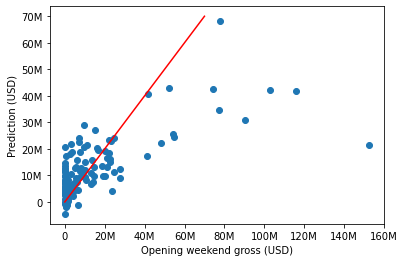

In [819]:
import matplotlib.pyplot as plt
fig, ax = plt.subplots(1, 1)
plt.scatter(y_test, y_pred)

ax.set_xlabel('Opening weekend gross (USD)')
ax.set_ylabel('Prediction (USD)')

ax.set_xticks([0,0.2e8,0.4e8,0.6e8,0.8e8,1e8,1.2e8,1.4e8,1.6e8])
ax.set_xticklabels(['0','20M','40M','60M','80M','100M','120M','140M','160M'])
ax.set_yticks([0,0.1e8,0.2e8,0.3e8,0.4e8,0.5e8,0.6e8,0.7e8])
ax.set_yticklabels(['0','10M','20M','30M','40M','50M','60M','70M'])

x=np.linspace(0,0.7e8,50)
y=x
plt.plot(x,y,color='red')

In [796]:
# Test with continuous variable only again
lr = LinearRegression()
lr.fit(X_train_scaled_df, y_train)
y_pred = lr.predict(X_test_scaled_df)
y_pred
from sklearn.metrics import mean_squared_error, r2_score
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
r2 = r2_score(y_test, y_pred)
print(f'RMSE: {rmse:.2f}\nr2: {r2:.2f}')

RMSE: 19117967.80
r2: 0.42
